In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [44]:
# 샘플 갯수 지정
N = 100

# 0부터 100까지 균등하게 100개의 샘플을 뽑습니다.
X = np.linspace(0, 1, N)
# y=sin(2*pi*x)의 함수를 적용합니다.
Y = np.sin(X * 2 * np.pi)

error = 0.2
T = Y + np.random.randn(*Y.shape) * error

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

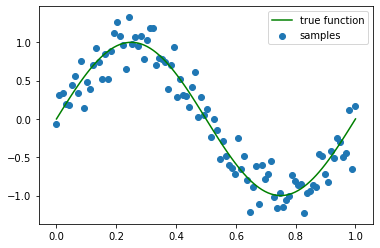

In [39]:
plt.scatter(X, T, label='samples')
plt.plot(X, Y, color='green', label='true function')
plt.legend()
plt.show()

In [4]:
M = 4

# Design Matrix
def get_design_matrix(X):
    design = []
    for m in range(M):
        design.append(X ** m) # m-order polynomial function
        
    design = np.stack(design, axis=1)
    
    return design

# Design Matrix, shape : [N, M]
Phi = get_design_matrix(X)
print(Phi)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.01010101e-02 1.02030405e-04 1.03061015e-06]
 [1.00000000e+00 2.02020202e-02 4.08121620e-04 8.24488122e-06]
 [1.00000000e+00 3.03030303e-02 9.18273646e-04 2.78264741e-05]
 [1.00000000e+00 4.04040404e-02 1.63248648e-03 6.59590497e-05]
 [1.00000000e+00 5.05050505e-02 2.55076013e-03 1.28826269e-04]
 [1.00000000e+00 6.06060606e-02 3.67309458e-03 2.22611793e-04]
 [1.00000000e+00 7.07070707e-02 4.99948985e-03 3.53499282e-04]
 [1.00000000e+00 8.08080808e-02 6.52994592e-03 5.27672398e-04]
 [1.00000000e+00 9.09090909e-02 8.26446281e-03 7.51314801e-04]
 [1.00000000e+00 1.01010101e-01 1.02030405e-02 1.03061015e-03]
 [1.00000000e+00 1.11111111e-01 1.23456790e-02 1.37174211e-03]
 [1.00000000e+00 1.21212121e-01 1.46923783e-02 1.78089434e-03]
 [1.00000000e+00 1.31313131e-01 1.72431385e-02 2.26425050e-03]
 [1.00000000e+00 1.41414141e-01 1.99979594e-02 2.82799426e-03]
 [1.00000000e+00 1.51515152e-01 2.29568411e-02 3.478309

In [34]:
alpha = 1e-2
beta = 10


In [35]:
# weight posterior

# Inverse of Covariance Matrix
S_N_inverse = alpha * np.eye(M) + beta * Phi.T @ Phi
S_N = np.linalg.inv(S_N_inverse)

# Mean 
#m_N = beta * S_N @ Phi.T @ T
m_N = np.linalg.solve(S_N_inverse, beta * Phi.T @ T)



In [36]:
# predictive distribution

def get_predictive_mean(m_N, phi):
    '''
    m_N : the mean of weight posterior, shape : [M,]
    phi : a sigle data point, shape : [M,]
    '''
    return m_N.T @ phi

def get_predictive_variance(beta, S_N, phi):
    '''
    beta : the precision of the data, shape : scalar
    S_N : the covariance matrix of the weight posterior, shape : [M, M]
    phi : a sigle data point, shape : [M,]
    '''
    
    return 1 / beta + phi @ S_N @ phi

mean_pred = np.array([get_predictive_mean(m_N, Phi[n]) for n in range(N)])
var_pred = np.array([get_predictive_variance(beta, S_N, Phi[n]) for n in range(N)])
std_pred = var_pred ** 0.5
print(std_pred)


[0.33786161 0.33498664 0.33248398 0.33032124 0.32846702 0.32689106
 0.32556447 0.32445982 0.32355129 0.32281471 0.32222764 0.32176933
 0.32142077 0.32116462 0.32098519 0.32086837 0.32080155 0.32077359
 0.32077469 0.32079633 0.32083117 0.32087301 0.32091664 0.3209578
 0.3209931  0.32101991 0.32103632 0.32104105 0.32103338 0.3210131
 0.32098042 0.32093593 0.32088055 0.32081545 0.32074202 0.32066181
 0.32057651 0.32048787 0.32039768 0.32030775 0.32021984 0.32013565
 0.3200568  0.31998477 0.31992092 0.31986644 0.31982234 0.31978944
 0.31976836 0.3197595  0.31976303 0.31977892 0.3198069  0.3198465
 0.31989703 0.31995759 0.32002709 0.32010429 0.32018776 0.32027596
 0.32036722 0.32045979 0.32055188 0.32064166 0.32072731 0.32080706
 0.32087924 0.32094229 0.32099486 0.32103579 0.32106422 0.32107962
 0.32108184 0.32107119 0.32104848 0.32101511 0.32097314 0.32092532
 0.32087525 0.32082736 0.32078706 0.3207608  0.32075617 0.32078196
 0.32084825 0.32096654 0.32114974 0.32141233 0.32177039 0.3222416

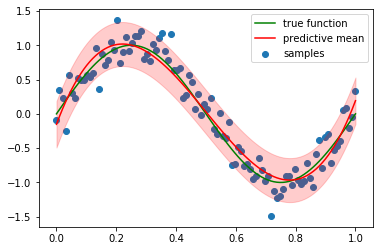

In [37]:
def polynomial_function(coeffs, X):
    output = np.zeros(*X.shape)
    for order, coeff in enumerate(coeffs):
        output += coeff * X ** order
        
    return output

plt.scatter(X, T, label='samples', alpha=1)
plt.plot(X, Y, color='green', label='true function')
plt.plot(X, mean_pred, color='red', label='predictive mean')
plt.fill_between(X, mean_pred-std_pred, mean_pred+std_pred, color='red', alpha=0.2)
plt.legend()
plt.show()

In [16]:
def get_alpha_beta(N, m_N, T, Phi, gamma):
    alpha = gamma / (m_N @ m_N)
    beta = (N - gamma) / np.sum((T - Phi @ m_N) ** 2)
    
    return alpha, beta

def get_gamma(alpha, eigenvalues):
    gamma = np.sum(eigenvalues / (alpha + eigenvalues))
    
    return gamma
    
gamma = 1
eigenvalues, _ = np.linalg.eig(Phi.T @ Phi)

for i in range(1000):
    gamma = get_gamma(alpha, eigenvalues)
    alpha, beta = get_alpha_beta(N, m_N, T, Phi, gamma)
    print(alpha, beta, gamma)
    
    # weight posterior

    # Inverse of Covariance Matrix
    S_N_inverse = alpha * np.eye(M) + beta * Phi.T @ Phi
    S_N = np.linalg.inv(S_N_inverse)

    # Mean 
    m_N = beta * S_N @ Phi.T @ T
    


0.005261741425405583 10.153958108140877 2.9614697145091133
0.001853079999792888 23.005085355691644 3.6532696162876515
0.001795367506108003 23.23720542482156 3.8442968245871696
0.0017961619654695044 23.236806590755794 3.848436688179972
0.0017961475439022432 23.23681405959987 3.848379436110859
0.001796147805397031 23.236813924200252 3.848380475323541
0.0017961478006546662 23.23681392665581 3.848380456480304
0.001796147800740528 23.23681392661137 3.8483804568220377
0.0017961478007373956 23.236813926612975 3.8483804568158506
0.0017961478007381085 23.23681392661265 3.848380456816076
0.0017961478007414986 23.23681392661085 3.8483804568160247
0.0017961478007390203 23.236813926612133 3.8483804568157804
0.0017961478007393502 23.236813926611966 3.8483804568159594
0.0017961478007391639 23.236813926612086 3.848380456815936
0.00179614780074011 23.236813926611614 3.8483804568159488
0.0017961478007406527 23.236813926611305 3.848380456815881
0.0017961478007368372 23.236813926613273 3.8483804568158417


In [17]:
1 / (N - gamma) * np.sum((T - Phi @ m_N) ** 2)

0.04303515977527232

In [11]:
w, v = np.linalg.eig(np.diag((1, 2, 3)))
print(w)

[1. 2. 3.]
